# Simplex implementation

Python implementation of the simplex algorithm for solving linear programming problems.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examples</a></span><ul class="toc-item"><li><span><a href="#Already-optimal-example" data-toc-modified-id="Already-optimal-example-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Already optimal example</a></span></li><li><span><a href="#Simple-example" data-toc-modified-id="Simple-example-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Simple example</a></span></li><li><span><a href="#Another-simple-example" data-toc-modified-id="Another-simple-example-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Another simple example</a></span></li><li><span><a href="#Unbounded-example" data-toc-modified-id="Unbounded-example-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Unbounded example</a></span></li><li><span><a href="#Artificial-variables-example" data-toc-modified-id="Artificial-variables-example-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Artificial variables example</a></span></li><li><span><a href="#Complex-example-with-artificial-variables" data-toc-modified-id="Complex-example-with-artificial-variables-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Complex example with artificial variables</a></span></li></ul></li><li><span><a href="#Time-experiments" data-toc-modified-id="Time-experiments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Time experiments</a></span></li></ul></div>

## Setup

In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

sns.set()
sys.path.append('..')
importlib.reload(sys.modules.get('simplex', sys))

from simplex import Simplex

In [2]:
%config Completer.use_jedi = False

## Examples

### Already optimal example

The problem to solve is:

$$\begin{equation}
    \begin{aligned}
        \max \quad & z = 0 x_1 + 0 x_2 - 3 x_3 - x_4 + 20 \\
        \textrm{s.t.} \quad & x_1 - 3 x_3 + 3 x_4 = 6, \\
        & x_2 - 8 x_3 + 4 x_4 = 4, \\
        & x_1, x_2, x_3, x_4 \ge 0
    \end{aligned}
\end{equation}$$

It is already optimal at $x_1 = 6, x_2 = 4, x_3 = 0, x_4 = 0$.

In [3]:
tableau_1 = np.array([
    [1, 0, -3, 3, 6],
    [0, 1, -8, 4, 4],
    [0, 0, -3, -1, -20]
])

In [4]:
simplex_1 = Simplex(tableau_1, ['==', '=='], ['>=0', '>=0', '>=0', '>=0'])

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 0 artificial variable(s).
Finished canonization.
Starting the simplex algorithm...
Finished simplex algorithm.


In [5]:
simplex_1.tableau

array([[  1.,   0.,  -3.,   3.,   6.],
       [  0.,   1.,  -8.,   4.,   4.],
       [  0.,   0.,  -3.,  -1., -20.]])

In [6]:
simplex_1.solution

array([6., 4., 0., 0.])

### Simple example

The simple problem to be solved is:

$$\begin{equation}
    \begin{aligned}
        \max \quad & z = 0 x_1 + 0 x_2 - 3 x_3 + x_4 + 20 \\
        \textrm{s.t.} \quad & x_1 - 3 x_3 + 3 x_4 = 6, \\
        & x_2 - 8 x_3 + 4 x_4 = 4, \\
        & x_1, x_2, x_3, x_4, \ge 0
    \end{aligned}
\end{equation}$$

In [7]:
tableau_2 = np.array([
    [1, 0, -3, 3, 6],
    [0, 1, -8, 4, 4],
    [0, 0, -3, 1, -20]
])

In [8]:
simplex_2 = Simplex(tableau_2, ['==', '=='], ['>=0', '>=0', '>=0', '>=0'])

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 0 artificial variable(s).
Finished canonization.
Starting the simplex algorithm...
Finished simplex algorithm.


In [9]:
simplex_2.tableau

array([[  1.  ,  -0.75,   3.  ,   0.  ,   3.  ],
       [  0.  ,   0.25,  -2.  ,   1.  ,   1.  ],
       [  0.  ,  -0.25,  -1.  ,   0.  , -21.  ]])

In [10]:
simplex_2.solution

array([3., 0., 0., 1.])

### Another simple example

$$\begin{equation}
    \begin{aligned}
        \max \quad & z = 6 x_1 + 14 x_2 + 13 x_3 \\
        \textrm{s.t.} \quad & \frac{1}{2} x_1 + 2 x_3 \le 24, \\
        & x_1 + 2 x_2 + 4 x_3 \le 60, \\
        & x_1, x_2, x_3, \ge 0
    \end{aligned}
\end{equation}$$

In [11]:
tableau_3 = np.array([
    [1/2, 2, 1, 24],
    [1, 2, 4, 60],
    [6, 14, 13, 0]
])

In [12]:
simples_3 = Simplex(tableau_3, ['<=', '<='], ['>=0', '>=0', '>=0'])

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 0 artificial variable(s).
Finished canonization.
Starting the simplex algorithm...
Finished simplex algorithm.


In [13]:
simples_3.tableau

array([[   1. ,    6. ,    0. ,    4. ,   -1. ,   36. ],
       [   0. ,   -1. ,    1. ,   -1. ,    0.5,    6. ],
       [   0. ,   -9. ,    0. ,  -11. ,   -0.5, -294. ]])

In [14]:
simples_3.solution

array([36.,  0.,  6.,  0.,  0.])

In [15]:
simples_3.objective

294.0

### Unbounded example

The following linear programming problem is unbounded:

$$\begin{equation}
    \begin{aligned}
        \max \quad & z = 0 x_1 + 0 x_2 + 3 x_3 - x_4 + 20 \\
        \textrm{s.t.} \quad & x_1 - 3 x_3 + 3 x_4 = 6, \\
        & x_2 - 8 x_3 + 4 x_4 = 4, \\
        & x_1, x_2, x_3, x_4, \ge 0
    \end{aligned}
\end{equation}$$

In [16]:
tableau_4 = np.array([
    [1, 0, -3, 3, 6],
    [0, 1, -8, 4, 4],
    [0, 0, 3, -1, -20]
])

In [17]:
simplex_4 = Simplex(tableau_4, ['==', '=='], ['>=0', '>=0', '>=0', '>=0'])

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 0 artificial variable(s).
Finished canonization.
Starting the simplex algorithm...
    The primal problem is unbounded.


### Artificial variables example

In this example, we will need to add artificial variables.

$$\begin{equation}
    \begin{aligned}
        \max \quad & z = - 3 x_1 + x_3\\
        \textrm{s.t.} \quad & x_1 + x_2 + x_3 + x_4 = 4, \\
        & - 2 x_1 + x_2 - x_3 = 1, \\
        & 3 x_2 + x_3 + x_4 = 9, \\
        & x_1, x_2, x_3, x_4 \ge 0
    \end{aligned}
\end{equation}$$

In [18]:
tableau_5 = np.array([
    [1, 1, 1, 1, 4],
    [-2, 1, -1, 0, 1],
    [0, 3, 1, 1, 9],
    [-3, 0, 1, 0, 0]
])

In [19]:
simplex_5 = Simplex(tableau_5, ['==', '==', '=='], ['>=0', '>=0', '>=0', '>=0'])

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 3 artificial variable(s).
        Adding artificial variable(s)... Done.
        Starting Phase I... Done.
        Starting transition from Phase I to Phase 2... Done.
Finished canonization.
Starting the simplex algorithm...
Finished simplex algorithm.


In [20]:
simplex_5.tableau

array([[ 1.5,  0. ,  1. ,  0. ,  1.5],
       [-0.5,  1. ,  0. ,  0. ,  2.5],
       [ 0. ,  0. ,  0. ,  1. ,  0. ],
       [-4.5,  0. ,  0. ,  0. , -1.5]])

In [21]:
simplex_5.solution

array([0. , 2.5, 1.5, 0. ])

In [22]:
simplex_5.objective

1.5

### Complex example with artificial variables

In this example, we allow some constraints to be inequalities and some variables to be free.

$$\begin{equation}
    \begin{aligned}
        \max \quad & z = - 3 x_1 + 2 x_2 - x_3 + 4 x_4\\
        \textrm{s.t.} \quad & x_1 + x_2 - 4 x_3 + 2 x_4 \ge 4, \\
        & - 3 x_1 + x_2 - 2 x_3 \le 6, \\
        & x_2 - x_4 = -1, \\
        & x_1 + x_2 - x_3 = 0, \\
        & x_3, x_4 \ge 0
    \end{aligned}
\end{equation}$$

In [23]:
tableau_6 = np.array([
    [1, 1, -4, 2, 4],
    [-3, 1, -2, 0, 6],
    [0, 1, 0, -1, -1],
    [1, 1, -1, 0, 0],
    [-3, 2, -1, 4, 0]
])

In [24]:
simples_6 = Simplex(tableau_6, ['>=', '<=', '==', '=='], ['R', 'R', '>=0', '>=0'])

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 3 artificial variable(s).
        Adding artificial variable(s)... Done.
        Starting Phase I... Done.
        Starting transition from Phase I to Phase 2... Done.
Finished canonization.
Starting the simplex algorithm...
Finished simplex algorithm.


In [25]:
simples_6.tableau

array([[ -1. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0.5,   0.5,   2. ],
       [  0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   2. ,   1. ,   2. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   2.5,   1.5,   5. ],
       [  0. ,   0. ,   1. ,  -1. ,   0. ,   0. ,   2.5,   1.5,   4. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. , -14.5,  -9.5, -32. ]])

In [26]:
simples_6.solution

array([0., 2., 4., 0., 2., 5., 0., 0.])

In [27]:
simples_6.objective

32.0

## Time experiments

We increase the number of constraints and see how much the time increases...

In [28]:
%%time
n = 10
tableau = np.random.randint(0, 100, [n+1, 20+1])
Simplex(tableau, ['<=']*(n), ['>=']*20);

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 0 artificial variable(s).
Finished canonization.
Starting the simplex algorithm...
Finished simplex algorithm.
CPU times: user 6 ms, sys: 526 µs, total: 6.53 ms
Wall time: 4.62 ms


In [29]:
%%time
n = 100
tableau = np.random.randint(0, 100, [n+1, 20+1])
Simplex(tableau, ['<=']*(n), ['>=']*20);

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 0 artificial variable(s).
Finished canonization.
Starting the simplex algorithm...
Finished simplex algorithm.
CPU times: user 28.3 ms, sys: 4.07 ms, total: 32.4 ms
Wall time: 27.1 ms


In [30]:
%%time
n = 1000
tableau = np.random.randint(0, 100, [n+1, 20+1])
Simplex(tableau, ['<=']*(n), ['>=']*20);

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 0 artificial variable(s).
Finished canonization.
Starting the simplex algorithm...
Finished simplex algorithm.
CPU times: user 127 ms, sys: 11.7 ms, total: 139 ms
Wall time: 135 ms


In [31]:
%%time
n = 10000
tableau = np.random.randint(0, 100, [n+1, 20+1])
Simplex(tableau, ['<=']*(n), ['>=']*20);

Canonizing the linear programming problem...
    Converting free variables to nonnegative variables... Done.
    Converting inequalities to equalities using slack and surplus variables... Done.
    Multiplying equations with a negative righthand side coefficient by −1... Done.
    Checking artificial variables needed... We need 0 artificial variable(s).
Finished canonization.
Starting the simplex algorithm...
Finished simplex algorithm.
CPU times: user 5.47 s, sys: 472 ms, total: 5.94 s
Wall time: 5.94 s


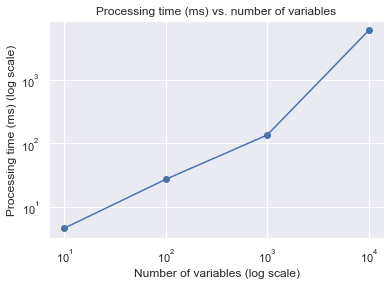

In [33]:
plt.loglog([10, 100, 1000, 10000], [4.62, 27.1, 135, 5.94*1000], '-o')
plt.xlabel('Number of variables (log scale)')
plt.ylabel('Processing time (ms) (log scale)')
plt.title('Processing time (ms) vs. number of variables')
plt.show()